In [6]:
train = pd.read_csv('C:/Users/82106\Desktop/데이터분석 프로젝트/빅데이터 공모전/전기자동차/archive11/train_IxoE5JN.csv')
test = pd.read_csv('C:/Users/82106\Desktop/데이터분석 프로젝트/빅데이터 공모전/전기자동차/archive11/test_WudNWDM.csv')

In [7]:
train.isnull().sum()

row_id         0
datetime       0
energy      1900
dtype: int64

In [8]:
train.dtypes

row_id        int64
datetime     object
energy      float64
dtype: object

In [9]:
test.dtypes

row_id       int64
datetime    object
dtype: object

In [10]:
train.shape

(94992, 3)

In [11]:
test.shape

(26304, 2)

In [12]:
test_original=test.copy()

##### 필요없는열 드랍

In [13]:
train_data = train.drop(["row_id"], axis=1)
test_data = test.drop(["row_id"], axis=1)

##### 범주형 원핫인코딩

In [14]:
cat_cols = [col for col in train_data.columns if train_data.dtypes[col] =="object"]
cat_cols

['datetime']

In [15]:
num_cols = [col for col in train_data.columns if train_data.dtypes[col] !="object"]
num_cols

['energy']

In [16]:
train_num = train_data[num_cols]
train_cat = train_data[cat_cols]

#### 결측치 대체

In [17]:
from sklearn.impute import SimpleImputer
num_impu=SimpleImputer(strategy = 'median')
train_num=pd.DataFrame(num_impu.fit_transform(train_num),columns=num_cols)

C:\Users\82106\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [18]:
train_data=pd.concat([train_num,train_cat],axis=1)
train_data.head()

,energy,datetime
0,1259.985563,2008-03-01 00:00:00
1,1095.541500,2008-03-01 01:00:00
2,1056.247500,2008-03-01 02:00:00
3,1034.742000,2008-03-01 03:00:00
4,1026.334500,2008-03-01 04:00:00


In [19]:
train_data.isnull().sum()

energy      0
datetime    0
dtype: int64

In [20]:
train_data["datetime"] = pd.to_datetime(train_data["datetime"], infer_datetime_format=True)
train_data = train_data.set_index(["datetime"])

In [21]:
test_data['datetime'] = pd.to_datetime(test_data['datetime'], infer_datetime_format = True)
test_data.head()

,datetime
0,2019-01-01 00:00:00
1,2019-01-01 01:00:00
2,2019-01-01 02:00:00
3,2019-01-01 03:00:00
4,2019-01-01 04:00:00


In [22]:
# get the min and max of data 

minDate = min(test.datetime)
maxDate = max(test.datetime)
print(minDate)
print(maxDate)

2019-01-01 00:00:00
2021-12-31 23:00:00


In [23]:
train_data.head()

,energy
datetime,
2008-03-01 00:00:00,1259.985563
2008-03-01 01:00:00,1095.541500
2008-03-01 02:00:00,1056.247500
2008-03-01 03:00:00,1034.742000
2008-03-01 04:00:00,1026.334500


#### train data 시각화

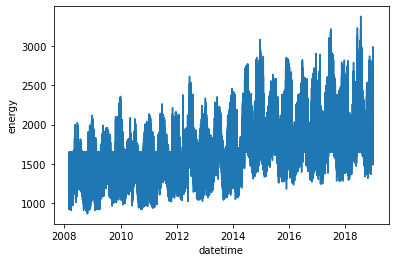

In [24]:
## plot graph
plt.xlabel("datetime")
plt.ylabel("energy")
plt.plot(train_data)
plt.show()

In [25]:
# determining rolling statistics
# window = 12 means at a yearly level
rolmean = train_data.rolling(window=12).mean()

rolstd = train_data.rolling(window=12).std()

print(rolmean, rolstd)

                          energy
datetime                        
2008-03-01 00:00:00          NaN
2008-03-01 01:00:00          NaN
2008-03-01 02:00:00          NaN
2008-03-01 03:00:00          NaN
2008-03-01 04:00:00          NaN
...                          ...
2018-12-31 19:00:00  2167.293700
2018-12-31 20:00:00  2245.280400
2018-12-31 21:00:00  2303.670967
2018-12-31 22:00:00  2347.728167
2018-12-31 23:00:00  2367.972200

[94992 rows x 1 columns]                          energy
datetime                       
2008-03-01 00:00:00         NaN
2008-03-01 01:00:00         NaN
2008-03-01 02:00:00         NaN
2008-03-01 03:00:00         NaN
2008-03-01 04:00:00         NaN
...                         ...
2018-12-31 19:00:00  356.825396
2018-12-31 20:00:00  301.988245
2018-12-31 21:00:00  241.294957
2018-12-31 22:00:00  185.663194
2018-12-31 23:00:00  145.808352

[94992 rows x 1 columns]


#### 이동평균(Rolling Mean)과 이동표준편차(Rolling Std)를 계산하고 시각화

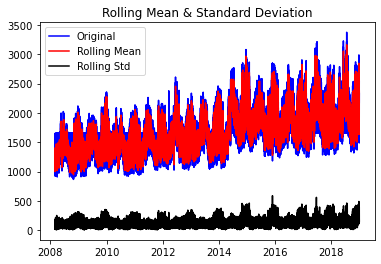

In [26]:
# plot rolling statistics
orig = plt.plot(train_data, color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block = False)

#### Dickey-Fuller 검정(Dickey-Fuller test)을 수행하여 주어진 시계열 데이터의 정상성(stationarity)을 평가하는 작업

In [27]:
# perform Dickey-Fullar test:
from statsmodels.tsa.stattools import adfuller
print("Result of Dickey-Fuller Test:")
dftest = adfuller(train_data['energy'], autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags used", "Number of observations used"])
for key,value in dftest[4].items():
    dfoutput["Critical value (%s)"%key] = value
print(dfoutput)

Result of Dickey-Fuller Test:
Test Statistic                -9.794869e+00
p-value                        6.212884e-17
#Lags used                     6.700000e+01
Number of observations used    9.492400e+04
Critical value (1%)           -3.430419e+00
Critical value (5%)           -2.861570e+00
Critical value (10%)          -2.566786e+00
dtype: float64


#### train_data를 로그 스케일로 변환하고, 이를 시각화

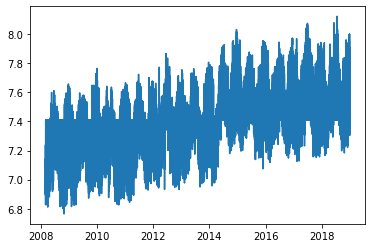

In [29]:
import numpy as np
# estimating trend
train_data_logscale = np.log(train_data)
plt.plot(train_data_logscale)

##### 이동평균 

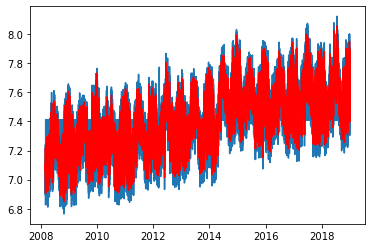

In [30]:
movingAverage = train_data_logscale.rolling(window = 12).mean()
movingSTD = train_data_logscale.rolling(window = 12).std()
plt.plot(train_data_logscale)
plt.plot(movingAverage, color='red')

In [31]:
train_data_logscaleMinusMovingAverage = train_data_logscale - movingAverage
train_data_logscaleMinusMovingAverage.head(12)

# remove nan values
train_data_logscaleMinusMovingAverage.dropna(inplace=True)
train_data_logscaleMinusMovingAverage.head(10)

,energy
datetime,
2008-03-01 11:00:00,0.143431
2008-03-01 12:00:00,0.145712
2008-03-01 13:00:00,0.129377
2008-03-01 14:00:00,0.122931
2008-03-01 15:00:00,0.103512
2008-03-01 16:00:00,0.078063
2008-03-01 17:00:00,0.047665
2008-03-01 18:00:00,0.010277
2008-03-01 19:00:00,-0.018512


#### 시계열 데이터에 대한 정상성(stationarity) 테스트를 수행

In [32]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    # determining rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #plot rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(movingAverage, color = 'red', label = 'Rolling Mean')
    std = plt.plot(movingSTD, color = 'black', label = 'Rolling STD')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)
    
    # perform Dickey-Fullar test:
    print("Result of Dickey-Fuller Test:")
    dftest = adfuller(train_data['energy'], autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags used", "Number of observations used"])
    for key,value in dftest[4].items():
        dfoutput["Critical value (%s)"%key] = value
    print(dfoutput)

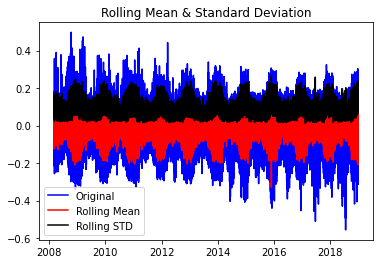

Result of Dickey-Fuller Test:
Test Statistic                -9.794869e+00
p-value                        6.212884e-17
#Lags used                     6.700000e+01
Number of observations used    9.492400e+04
Critical value (1%)           -3.430419e+00
Critical value (5%)           -2.861570e+00
Critical value (10%)          -2.566786e+00
dtype: float64


In [33]:
test_stationarity(train_data_logscaleMinusMovingAverage)

##### 지수 가중 이동평균

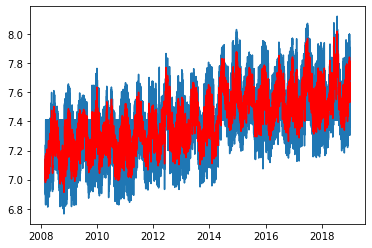

In [34]:
exponentialDecayWeightedAverage = train_data_logscale.ewm(halflife=12, min_periods = 0, adjust = True).mean()
plt.plot(train_data_logscale)
plt.plot(exponentialDecayWeightedAverage, color='red')

#### 원본 로그 스케일 시계열 데이터에서 지수 가중 이동평균을 뺀 후, 그 결과에 대한 정상성(stationarity) 테스트를 수행

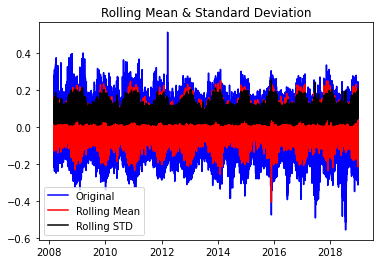

Result of Dickey-Fuller Test:
Test Statistic                -9.794869e+00
p-value                        6.212884e-17
#Lags used                     6.700000e+01
Number of observations used    9.492400e+04
Critical value (1%)           -3.430419e+00
Critical value (5%)           -2.861570e+00
Critical value (10%)          -2.566786e+00
dtype: float64


In [35]:
train_data_logscaleMinusMovingexponentialDecayWeightedAverage = train_data_logscale - exponentialDecayWeightedAverage
test_stationarity(train_data_logscaleMinusMovingexponentialDecayWeightedAverage)

#### 시계열 데이터에 대해 로그 스케일 변환 후, 차분(differencing)을 수행하고, 그 결과를 시각화

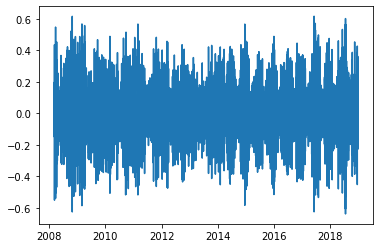

In [36]:
datasetLogDiffshifting = train_data_logscale - train_data_logscale.shift()
plt.plot(datasetLogDiffshifting)

#### 시계열 데이터에 로그 스케일 변환 후 차분(differencing)을 적용하고, 이후에 나타난 결측값을 제거하고 정상성(stationarity) 테스트를 다시 수행

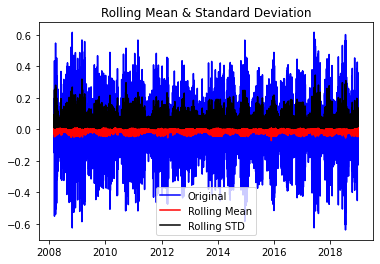

Result of Dickey-Fuller Test:
Test Statistic                -9.794869e+00
p-value                        6.212884e-17
#Lags used                     6.700000e+01
Number of observations used    9.492400e+04
Critical value (1%)           -3.430419e+00
Critical value (5%)           -2.861570e+00
Critical value (10%)          -2.566786e+00
dtype: float64


In [37]:
datasetLogDiffshifting.dropna(inplace=True)
test_stationarity(datasetLogDiffshifting)

#### 시계열 데이터를 분해하여 그 결과를 시각화

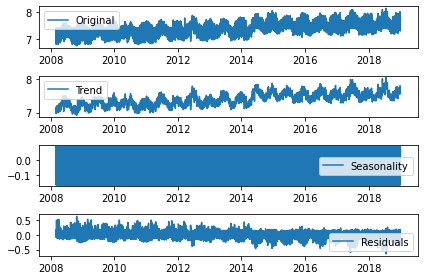

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(train_data_logscale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(train_data_logscale, label = "Original")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label ='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

#### 시계열 데이터의 분해에서 얻은 잔차(residual)를 새로운 데이터로 사용하고, 해당 데이터에 대한 정상성(stationarity) 테스트를 수행하는 작업

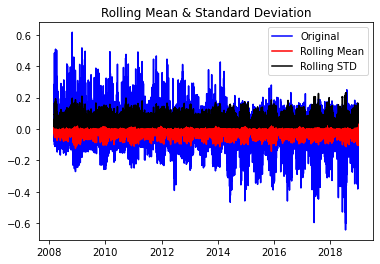

Result of Dickey-Fuller Test:
Test Statistic                -9.794869e+00
p-value                        6.212884e-17
#Lags used                     6.700000e+01
Number of observations used    9.492400e+04
Critical value (1%)           -3.430419e+00
Critical value (5%)           -2.861570e+00
Critical value (10%)          -2.566786e+00
dtype: float64


In [39]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)


#### ACF (자기상관 함수) 및 PACF (부분 자기상관 함수) 그래프를 그리는 작업

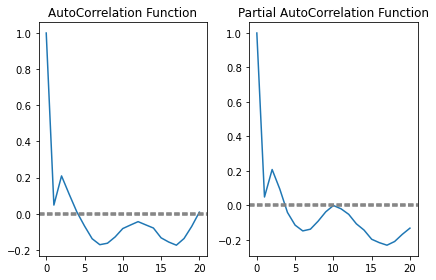

In [40]:
# ACF and PACF plots
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffshifting, nlags=20)
lag_pacf = pacf(datasetLogDiffshifting, nlags=20, method='ols')

#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffshifting)), linestyle = '--', color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffshifting)), linestyle = '--', color = 'gray')
plt.title('AutoCorrelation Function')

# plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffshifting)), linestyle = '--', color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffshifting)), linestyle = '--', color = 'gray')
plt.title('Partial AutoCorrelation Function')
plt.tight_layout()

#### ARIMA(AutoRegressive Integrated Moving Average) 모델 중 AR(AutoRegressive) 모델을 구축하고 해당 모델을 학습시킨 후, 예측 결과와 원본 데이터를 시각화하고 모델의 성능을 측정

C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


Plotting AR model


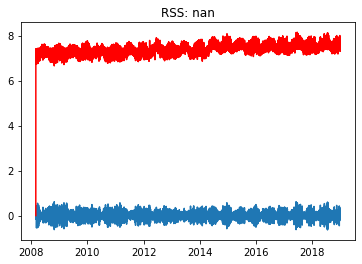

In [41]:
from statsmodels.tsa.arima.model import ARIMA
#AR MODEL
# order(p,d,q)
model = ARIMA(train_data_logscale, order=(2,1,0))
results_AR = model.fit()
plt.plot(datasetLogDiffshifting)
plt.plot(results_AR.fittedvalues, color = 'red')
# RSS = residual sum of square
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffshifting["energy"])**2))
print('Plotting AR model')

####  ARIMA 모델 중 MA (Moving Average) 모델을 구축하고 해당 모델을 학습시킨 후, 예측 결과와 원본 데이터를 시각화하고 모델의 성능을 측정하는 작업을 수행

C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


Plotting MA model


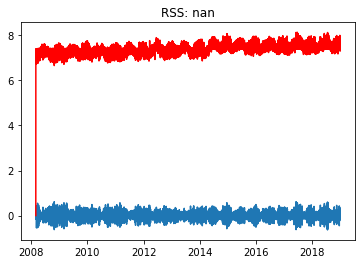

In [42]:
# MA model

model = ARIMA(train_data_logscale, order=(0,1,2))
results_MA = model.fit()
plt.plot(datasetLogDiffshifting)
plt.plot(results_MA.fittedvalues, color = 'red')
# RSS = residual sum of square
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffshifting["energy"])**2))
print('Plotting MA model')

#### ARIMA (AutoRegressive Integrated Moving Average) 모델을 구축하고 해당 모델을 학습시킨 후, 예측 결과와 원본 데이터를 시각화하고 모델의 성능을 측정

C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\82106\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\82106\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Plotting ARIMA model


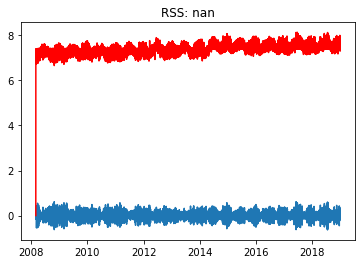

In [43]:
model = ARIMA(train_data_logscale, order=(2,1,2))
results_ARIMA = model.fit()
plt.plot(datasetLogDiffshifting)
plt.plot(results_MA.fittedvalues, color = 'red')
# RSS = residual sum of square
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffshifting["energy"])**2))
print('Plotting ARIMA model')

#### 처음 몇 개의 예측값을 출력

In [44]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy = True)
print(predictions_ARIMA_diff.head())

datetime
2008-03-01 00:00:00    0.000000
2008-03-01 01:00:00    7.138856
2008-03-01 02:00:00    6.978315
2008-03-01 03:00:00    6.941305
2008-03-01 04:00:00    6.927558
dtype: float64


#### ARIMA 모델에 의해 예측된 차분된 시계열 데이터를 누적합산한 결과를 출력하는 작업을 수행

In [45]:
# Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

datetime
2008-03-01 00:00:00     0.000000
2008-03-01 01:00:00     7.138856
2008-03-01 02:00:00    14.117170
2008-03-01 03:00:00    21.058476
2008-03-01 04:00:00    27.986034
dtype: float64


####  ARIMA 모델에 의한 예측값을 로그 스케일로 변환하고, 누적된 차분 예측값을 원래 로그 스케일의 시계열 데이터에 추가

In [46]:
predictions_ARIMA_log = pd.Series(train_data_logscale['energy'], index = train_data_logscale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

datetime
2008-03-01 00:00:00     7.138856
2008-03-01 01:00:00    14.137860
2008-03-01 02:00:00    21.079648
2008-03-01 03:00:00    28.000383
2008-03-01 04:00:00    34.919783
dtype: float64

#### 로그 스케일로 변환한 예측값을 원래의 스케일로 되돌리고, 원래 시계열 데이터와 ARIMA 모델의 예측값을 시각화

C:\Users\82106\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


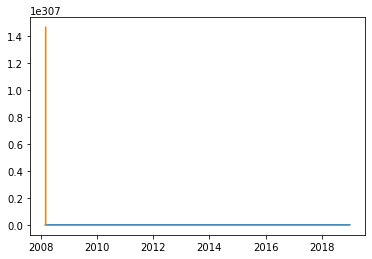

In [47]:
# when we do exponential of data we get original values
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(train_data)
plt.plot(predictions_ARIMA)

In [48]:
train_data_logscale

,energy
datetime,
2008-03-01 00:00:00,7.138856
2008-03-01 01:00:00,6.999004
2008-03-01 02:00:00,6.962478
2008-03-01 03:00:00,6.941907
2008-03-01 04:00:00,6.933749
...,...
2018-12-31 19:00:00,7.835360
2018-12-31 20:00:00,7.808682
2018-12-31 21:00:00,7.768954


#### ARIMA 모델을 사용하여 미래 예측을 수행하고 그 결과를 시각화

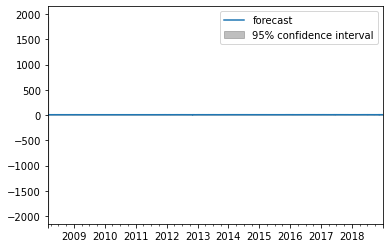

In [49]:
from statsmodels.graphics.tsaplots import plot_predict
#results_ARIMA.plot_predict(1,121296)
x = results_ARIMA.forecast(steps=26304)
plt.show()
#3 years so 24 * 365 * 3
plot_predict(results_ARIMA)
plt.show()

#### 3년 시간 단계에 대한 값을 예측

In [50]:
# it will give predicted values
x = results_ARIMA.forecast(steps=26304)
x

2019-01-01 00:00:00    7.681357
2019-01-01 01:00:00    7.675204
2019-01-01 02:00:00    7.670394
2019-01-01 03:00:00    7.668174
2019-01-01 04:00:00    7.669043
                         ...   
2021-12-31 19:00:00    7.679300
2021-12-31 20:00:00    7.679300
2021-12-31 21:00:00    7.679300
2021-12-31 22:00:00    7.679300
2021-12-31 23:00:00    7.679300
Freq: H, Name: predicted_mean, Length: 26304, dtype: float64

#### 원래 데이터와 동일한 스케일에서 예측값을 해석

In [51]:
y = np.exp(x)
y

2019-01-01 00:00:00    2167.558689
2019-01-01 01:00:00    2154.262313
2019-01-01 02:00:00    2143.926116
2019-01-01 03:00:00    2139.172348
2019-01-01 04:00:00    2141.032120
                          ...     
2021-12-31 19:00:00    2163.105166
2021-12-31 20:00:00    2163.105166
2021-12-31 21:00:00    2163.105166
2021-12-31 22:00:00    2163.105166
2021-12-31 23:00:00    2163.105166
Freq: H, Name: predicted_mean, Length: 26304, dtype: float64

In [52]:
test1 = pd.DataFrame(y)
test1

,predicted_mean
2019-01-01 00:00:00,2167.558689
2019-01-01 01:00:00,2154.262313
2019-01-01 02:00:00,2143.926116
2019-01-01 03:00:00,2139.172348
2019-01-01 04:00:00,2141.032120
...,...
2021-12-31 19:00:00,2163.105166
2021-12-31 20:00:00,2163.105166
2021-12-31 21:00:00,2163.105166
2021-12-31 22:00:00,2163.105166


In [53]:
test1 = test1.reset_index().rename(columns={'index':'time'})
test1.columns = ['Time', 'energy']
print(test1)

                     Time       energy
0     2019-01-01 00:00:00  2167.558689
1     2019-01-01 01:00:00  2154.262313
2     2019-01-01 02:00:00  2143.926116
3     2019-01-01 03:00:00  2139.172348
4     2019-01-01 04:00:00  2141.032120
...                   ...          ...
26299 2021-12-31 19:00:00  2163.105166
26300 2021-12-31 20:00:00  2163.105166
26301 2021-12-31 21:00:00  2163.105166
26302 2021-12-31 22:00:00  2163.105166
26303 2021-12-31 23:00:00  2163.105166

[26304 rows x 2 columns]


In [54]:
Target = pd.DataFrame(test1.energy)

In [55]:
row_id=pd.DataFrame(test_original.row_id)

In [56]:
pred=pd.concat([row_id,Target],axis=1)

In [57]:
pred

,row_id,energy
0,94993,2167.558689
1,94994,2154.262313
2,94995,2143.926116
3,94996,2139.172348
4,94997,2141.032120
...,...,...
26299,121292,2163.105166
26300,121293,2163.105166
26301,121294,2163.105166
26302,121295,2163.105166


### 에너지 소비량이 천천히 증가

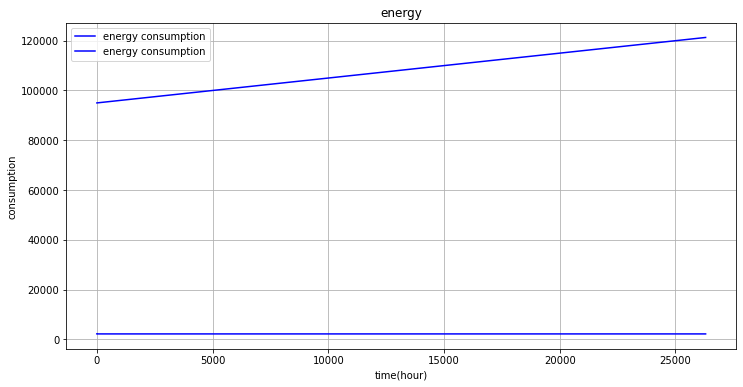

In [60]:
import matplotlib.pyplot as plt

# 미래 예측 값을 꺾은선 그래프로 시각화
plt.figure(figsize=(12, 6))  # 그래프의 크기 지정 (선택사항)
plt.plot(pred, label='energy consumption', color='blue', linestyle='-')  # 예측값 그래프
plt.xlabel('time(hour)')  # x 축 레이블 (시간, 날짜 등)
plt.ylabel('consumption')  # y 축 레이블 (예측값의 의미에 따라 지정)
plt.title('energy')  # 그래프 제목
plt.legend()  # 범례 표시 (선택사항)
plt.grid(True)  # 그리드 표시 (선택사항)
plt.show()  # 그래프 출력
